<a href="https://colab.research.google.com/github/johaneshan/tugasprakAI/blob/main/VGG19_G231200156_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating CNN Using Scratch And Transfer Learning

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Test'
valid_path = '/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Train'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Train/*')

In [ ]:
folders

['/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Train/Uninfected',
 '/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Train/Parasite']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-20-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 110s 9s/step - loss: 1.6706 - accuracy: 0.6010 - val_loss: 0.9290 - val_accuracy: 0.3806
Epoch 2/50
13/13 [==============================] - 32s 2s/step - loss: 0.5125 - accuracy: 0.7332 - val_loss: 0.9825 - val_accuracy: 0.3134
Epoch 3/50
13/13 [==============================] - 32s 2s/step - loss: 0.4641 - accuracy: 0.7572 - val_loss: 0.8990 - val_accuracy: 0.3806
Epoch 4/50
13/13 [==============================] - 30s 2s/step - loss: 0.4024 - accuracy: 0.7933 - val_loss: 0.7838 - val_accuracy: 0.4552
Epoch 5/50
13/13 [==============================] - 31s 2s/step - loss: 0.4109 - accuracy: 0.7861 - val_loss: 1.1599 - val_accuracy: 0.4328
Epoch 6/50
13/13 [==============================] - 30s 2s/step - loss: 0.3858 - accuracy: 0.8413 - val_loss: 0.6996 - val_accuracy: 0.5597
Epoch 7/50
13/13 [==============================] - 32s 2s/step - loss: 0.3749 - accuracy: 0.8438 - val_loss: 0.9733 - val_accuracy: 0.4925
Epoch 8/50
13/13 [=

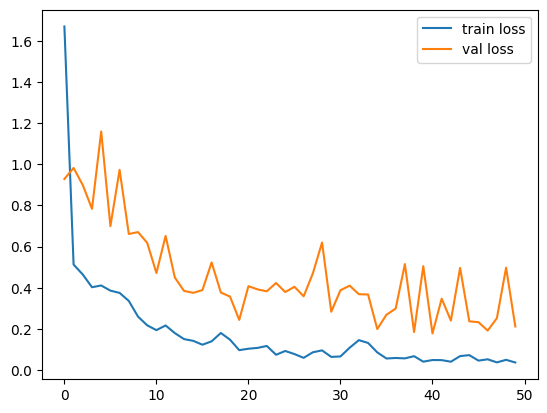

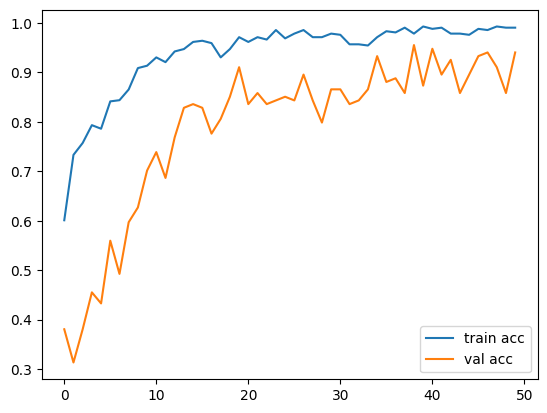

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 4s 584ms/step


In [ ]:
y_pred

array([[9.99999821e-01, 1.16224498e-07],
       [1.21871494e-01, 8.78128469e-01],
       [9.99999821e-01, 9.06663260e-08],
       [2.19169870e-01, 7.80830145e-01],
       [9.98194516e-01, 1.80550246e-03],
       [3.07732578e-02, 9.69226658e-01],
       [1.92597397e-02, 9.80740190e-01],
       [9.97852921e-01, 2.14708922e-03],
       [3.29189822e-02, 9.67081010e-01],
       [8.33326392e-03, 9.91666734e-01],
       [2.66497098e-02, 9.73350227e-01],
       [9.99998987e-01, 9.26621283e-07],
       [6.24610623e-03, 9.93753970e-01],
       [6.46573067e-01, 3.53426963e-01],
       [9.99939740e-01, 6.01380707e-05],
       [9.98746693e-01, 1.25337741e-03],
       [1.02929898e-01, 8.97070050e-01],
       [6.07135054e-03, 9.93928730e-01],
       [9.95637000e-01, 4.36303066e-03],
       [9.99977648e-01, 2.22412600e-05],
       [9.91935194e-01, 8.06469843e-03],
       [3.39911468e-02, 9.66008782e-01],
       [9.99955714e-01, 4.42285273e-05],
       [5.05770519e-02, 9.49422896e-01],
       [9.999999

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
model=load_model('model_vgg19.h5')


In [ ]:
img=image.load_img('/content/gdrive/MyDrive/Khusus Kuliah/Kecerdasan Buatan/Praktikum 9/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 160ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 79ms/step


In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
